<a href="https://colab.research.google.com/github/AishuShans/Task-5-AI-ML-intern-/blob/main/Decision_Trees_and_Random_Forests_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

In [9]:
try:
    df = pd.read_csv("heart_disease.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'heart_disease.csv' was not found. Please make sure it's uploaded to Colab.")
    exit()

Dataset loaded successfully!


assuming 'target' as the target variable for classification

In [10]:
if 'target' not in df.columns:
    print("Error: The 'target' column was not found in the dataset. Please specify the correct target variable name.")
    exit()

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 1 : Training a Decision Tree Classifier and visualizing the tree

Training a Decision Tree Classifier

In [11]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.9708

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



Visualizing the Decision Tree

In [12]:
import os
if os.path.exists("decision_tree"):
    with open("decision_tree", "r") as f:
        dot_code = f.read()
    graph_colab = graphviz.Source(dot_code)
    image_path = graph_colab.render("decision_tree", format="png")
    Image(filename=image_path)
else:
    print("Error generating decision tree visualization.")

STEP 2 : Analyzing overfitting and control tree depth

Training trees with different maximum depths

In [13]:
depths = [None, 2, 4, 6, 8, 10]
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt_clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf_depth.fit(X_train, y_train)
    y_train_pred_depth = dt_clf_depth.predict(X_train)
    y_test_pred_depth = dt_clf_depth.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred_depth))
    test_accuracies.append(accuracy_score(y_test, y_test_pred_depth))
    print(f"Max Depth: {depth}, Training Accuracy: {train_accuracies[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")


Max Depth: None, Training Accuracy: 1.0000, Test Accuracy: 0.9708
Max Depth: 2, Training Accuracy: 0.7727, Test Accuracy: 0.7013
Max Depth: 4, Training Accuracy: 0.8968, Test Accuracy: 0.8344
Max Depth: 6, Training Accuracy: 0.9484, Test Accuracy: 0.8864
Max Depth: 8, Training Accuracy: 0.9888, Test Accuracy: 0.9545
Max Depth: 10, Training Accuracy: 1.0000, Test Accuracy: 0.9708


Plotting the accuracies vs. tree depth

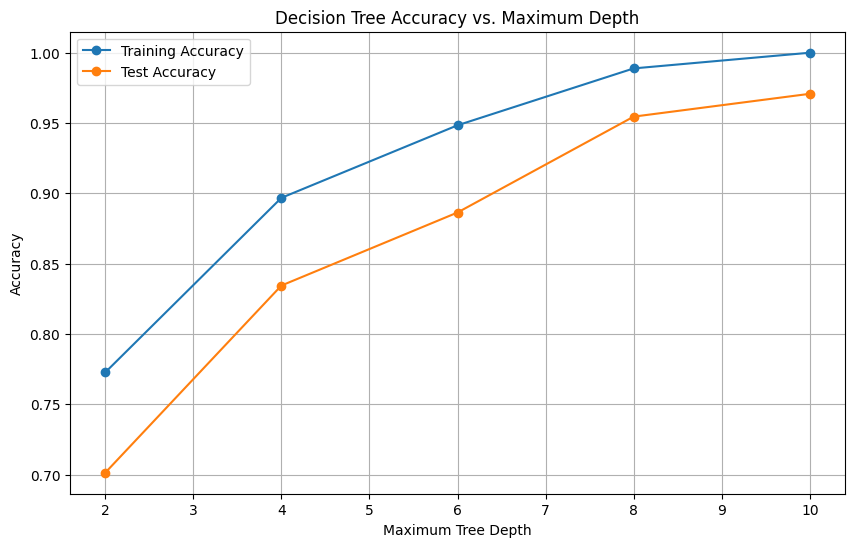

Observation: As tree depth increases, training accuracy generally increases (potential overfitting), while test accuracy might plateau or decrease after a certain point.


In [14]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Maximum Depth')
plt.legend()
plt.grid(True)
plt.show()
print("Observation: As tree depth increases, training accuracy generally increases (potential overfitting), while test accuracy might plateau or decrease after a certain point.")


STEP 3 : Training a Random Forest and compare accuracy

In [15]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Observation: Random Forests often outperform single Decision Trees due to the ensemble nature, which reduces overfitting and improves generalization.")


Random Forest Classifier Accuracy: 0.9805
Decision Tree Accuracy: 0.9708

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Observation: Random Forests often outperform single Decision Trees due to the ensemble nature, which reduces overfitting and improves generalization.


STEP 4 : Interpreting feature importances

Getting feature importances from the Random Forest model

In [16]:
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nFeature Importances (Random Forest):")
for i in range(X.shape[1]):
    print(f"{feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]:.4f}")



Feature Importances (Random Forest):
cp: 0.1323
thalach: 0.1250
ca: 0.1229
oldpeak: 0.1229
thal: 0.1130
age: 0.0856
chol: 0.0799
trestbps: 0.0684
slope: 0.0513
exang: 0.0422
sex: 0.0287
restecg: 0.0182
fbs: 0.0097


Plotting feature importances

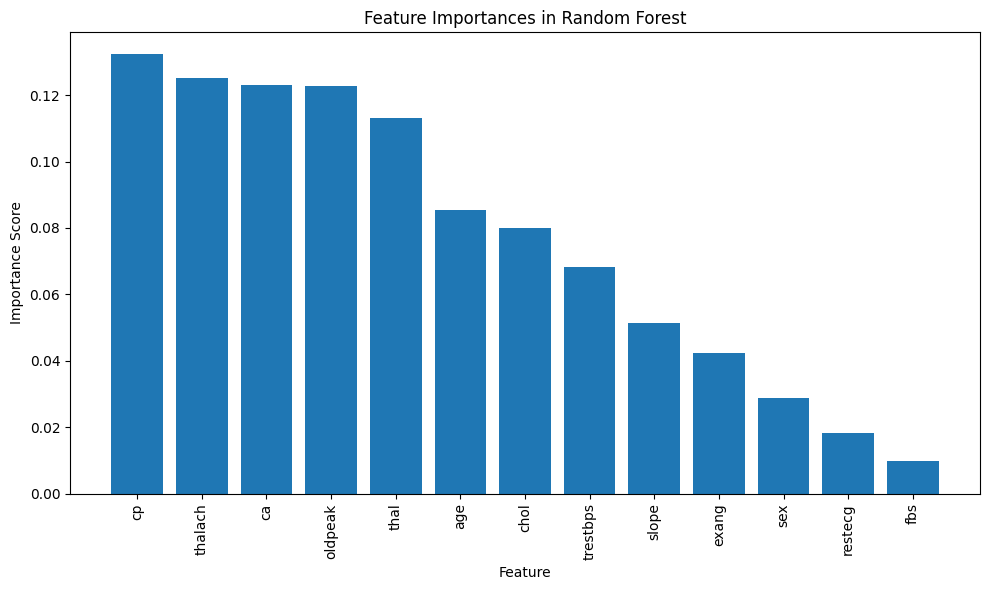

Interpretation: The plot and the printed values show which features the Random Forest deemed most important in making predictions.


In [17]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()
print("Interpretation: The plot and the printed values show which features the Random Forest deemed most important in making predictions.")


STEP 5 : Evaluating using cross-validation

Performing cross-validation for Decision Tree

In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dt = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=cv, scoring='accuracy')
print(f"\nCross-validation scores for Decision Tree: {cv_scores_dt}")
print(f"Mean cross-validation accuracy (Decision Tree): {np.mean(cv_scores_dt):.4f}")



Cross-validation scores for Decision Tree: [0.98536585 1.         1.         1.         1.        ]
Mean cross-validation accuracy (Decision Tree): 0.9971


Performing cross-validation for Random Forest

In [19]:
cv_scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=cv, scoring='accuracy')
print(f"\nCross-validation scores for Random Forest: {cv_scores_rf}")
print(f"Mean cross-validation accuracy (Random Forest): {np.mean(cv_scores_rf):.4f}")
print("Observation: Cross-validation provides a more robust estimate of the model's performance by evaluating it on multiple folds of the data.")


Cross-validation scores for Random Forest: [0.98536585 1.         1.         1.         1.        ]
Mean cross-validation accuracy (Random Forest): 0.9971
Observation: Cross-validation provides a more robust estimate of the model's performance by evaluating it on multiple folds of the data.
